<a href="https://colab.research.google.com/github/Carlos-51/miweb/blob/master/DETECTOR_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

DESCARGAR LISTA COCO

In [4]:
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names

--2023-11-26 22:28:40--  https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/coco.names [following]
--2023-11-26 22:28:40--  https://github.com/pjreddie/darknet/raw/master/data/coco.names
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names [following]
--2023-11-26 22:28:40--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 20

In [5]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
from IPython.display import display


# Carga el modelo Faster R-CNN preentrenado en COCO
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Carga la lista de nombres de clases COCO
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Función para realizar la detección de objetos
def detect_objects(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).unsqueeze(0)

    with torch.no_grad():
        prediction = model(img_tensor)

    # Extrae las cajas del resultado de la predicción
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()

    # Dibuja las cajas en la imagen
    draw = ImageDraw.Draw(img)
    for box, score, label in zip(boxes, scores, labels):
        if score > 0.10:  # Ajusta este umbral según sea necesario
            # Dibuja un rectángulo transparente como fondo para el texto
            text_box = [box[0], box[1], box[2], box[1] + 20]
            draw.rectangle(text_box, fill="black", outline=None)

            # Dibuja el nombre de la clase sobre el rectángulo
            class_name = classes[label]
            text = f"{class_name}: {score:.2f}"
            draw.text((box[0], box[1]), text, fill="white", font=None)

            # Dibuja el cuadro delimitador
            draw.rectangle(box, outline="red", width=2)

    # Guarda la imagen con las cajas y nombres dibujados
    result_path = 'result_image.jpg'
    img.save(result_path)

    # Muestra la imagen con las cajas y nombres dibujados
    display(Image.open(result_path))

# Ejemplo de uso
image_path = '/content/imagenes/imagen1.jpeg'
detect_objects(image_path)

IndexError: ignored

Número de objetos detectados: 37


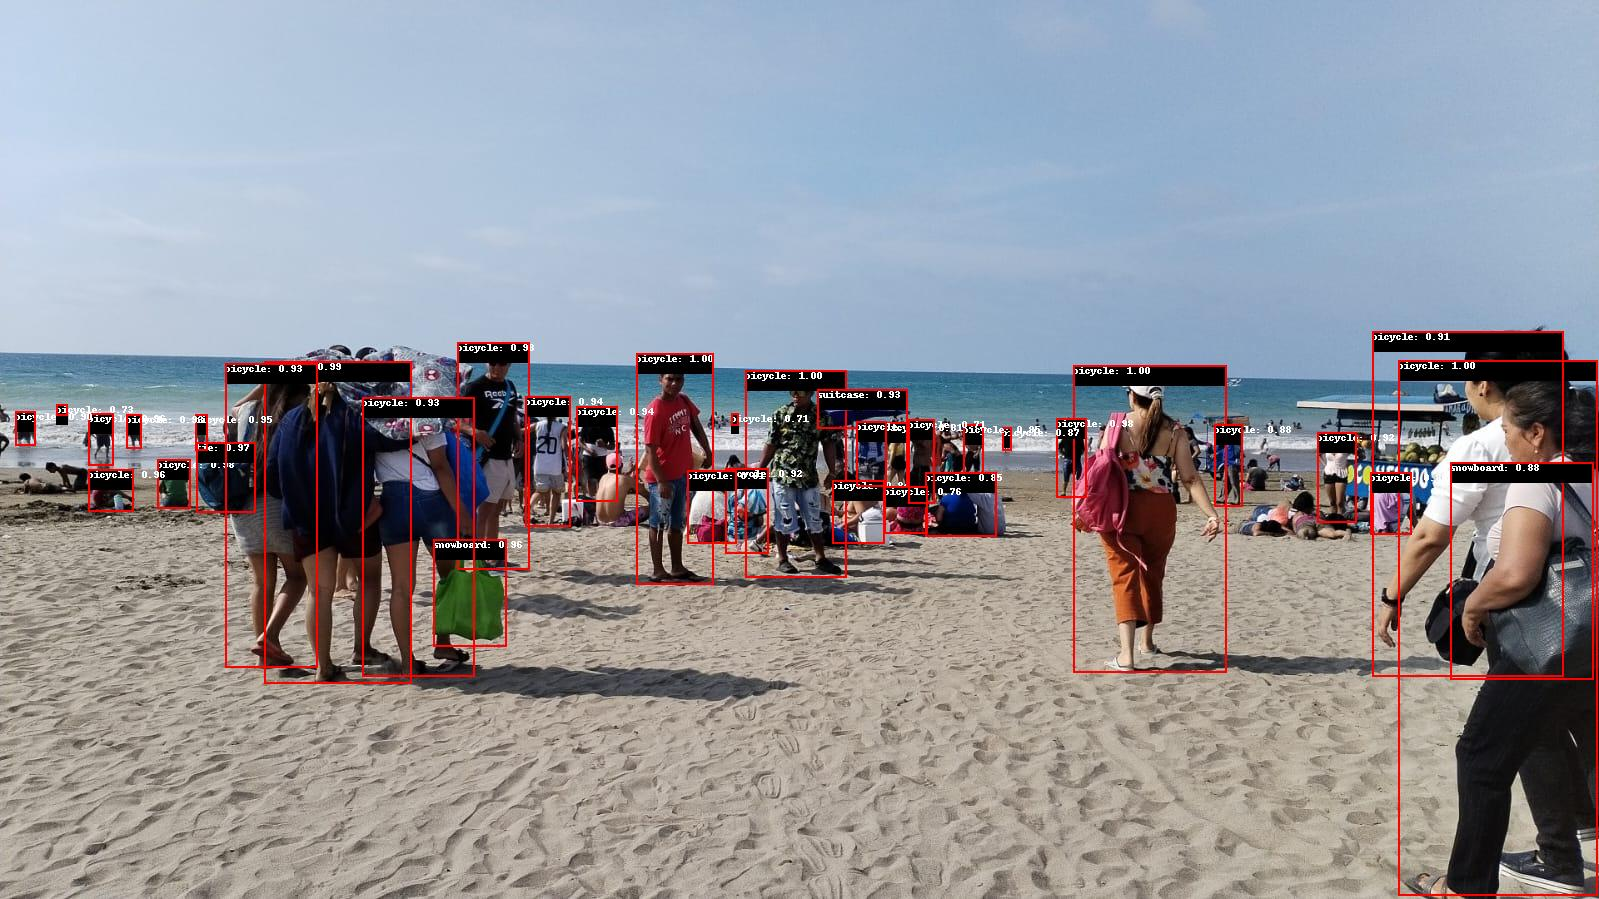

In [69]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
from IPython.display import display

# Carga el modelo Faster R-CNN preentrenado en COCO
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Carga la lista de nombres de clases COCO
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Función para realizar la detección de objetos
def detect_objects(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).unsqueeze(0)

    with torch.no_grad():
        prediction = model(img_tensor)

    # Extrae las cajas del resultado de la predicción
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()

    # Inicializa un contador para el número de objetos detectados
    object_count = 0

    # Dibuja las cajas en la imagen
    draw = ImageDraw.Draw(img)
    for box, score, label in zip(boxes, scores, labels):
        class_index = label - 1
        if score > 0.7 and 0 <= class_index < len(classes):  # Verifica que el índice esté dentro del rango
            # Dibuja un rectángulo transparente como fondo para el texto
            text_box = [box[0], box[1], box[2], box[1] + 20]
            draw.rectangle(text_box, fill="black", outline=None)

            # Dibuja el nombre de la clase sobre el rectángulo
            class_name = classes[label]
            text = f"{class_name}: {score:.2f}"
            draw.text((box[0], box[1]), text, fill="white", font=None)

            # Incrementa el contador de objetos detectados
            object_count += 1

            # Dibuja el cuadro delimitador
            draw.rectangle(box, outline="red", width=2)

    # Muestra el número de objetos detectados
    print(f"Número de objetos detectados: {object_count}")

    # Guarda la imagen con las cajas y nombres dibujados
    result_path = 'result_image.jpg'
    img.save(result_path)

    # Muestra la imagen con las cajas y nombres dibujados
    display(Image.open(result_path))

# Ejemplo de uso
image_path = '/content/imagenes/imagen50.jpeg'
detect_objects(image_path)